In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [3]:
df.shape

(103, 7)

# Data Cleaning

#### Removing unwanted . and ,

In [4]:
df['Production (Tons)'] = df['Production (Tons)'].str.replace('.','')
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].str.replace('.','').str.replace(',','.')
df['Acreage (Hectare)'] = df['Acreage (Hectare)'].str.replace('.','')
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].str.replace('.','').str.replace(',','.')

In [5]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


#### Renaming the columns

In [6]:
df.rename(columns={'Production (Tons)' : 'Production(Tons)','Production per Person (Kg)':'Production_per_Person(Kg)','Acreage (Hectare)':'Acreage(Hectare)','Yield (Kg / Hectare)':'Yield(Kg/Hectare)'},inplace=True)
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


#### Checking for null values and processing it

In [7]:
df.isnull().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [8]:
df[df['Acreage(Hectare)'].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [9]:
# Removing null value and resetting index
df = df.dropna().reset_index()
df.isnull().sum()

index                        0
Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             0
Yield(Kg/Hectare)            0
dtype: int64

In [10]:
df.head()

,index,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879


#### Removing unwanted column 'unnamed'

In [11]:
df.drop(['index','Unnamed: 0'],axis = 1,inplace = True)
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


### Changing appropriate datatypes

In [12]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [13]:
df['Acreage(Hectare)'] = df['Acreage(Hectare)'].astype(float)
df['Production(Tons)'] = df['Production(Tons)'].astype(float)
df['Production_per_Person(Kg)'] = df['Production_per_Person(Kg)'].astype(float)
df['Yield(Kg/Hectare)'] = df['Yield(Kg/Hectare)'].astype(float)

In [14]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [15]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


#### Checking for duplicate values

In [16]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_Person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

# Data Analysis

## Univariate Analysis

In [17]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### How many Countries produce sugarcane from each Continent ?

In [18]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

#### Africa has the highest no of countries.

<Axes: xlabel='Continent'>

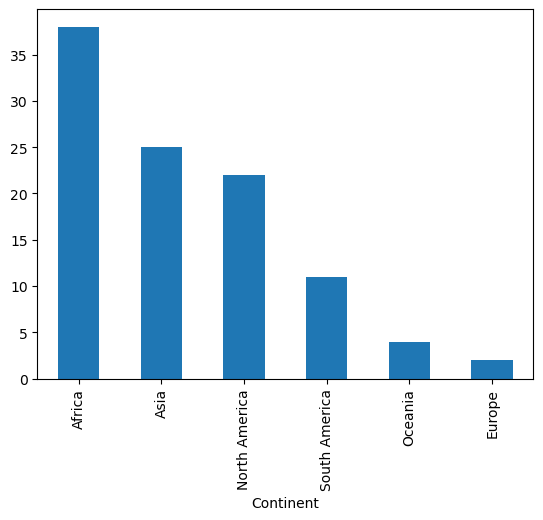

In [19]:
df['Continent'].value_counts().plot(kind = 'bar')

### Distribution of Columns

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Count'>

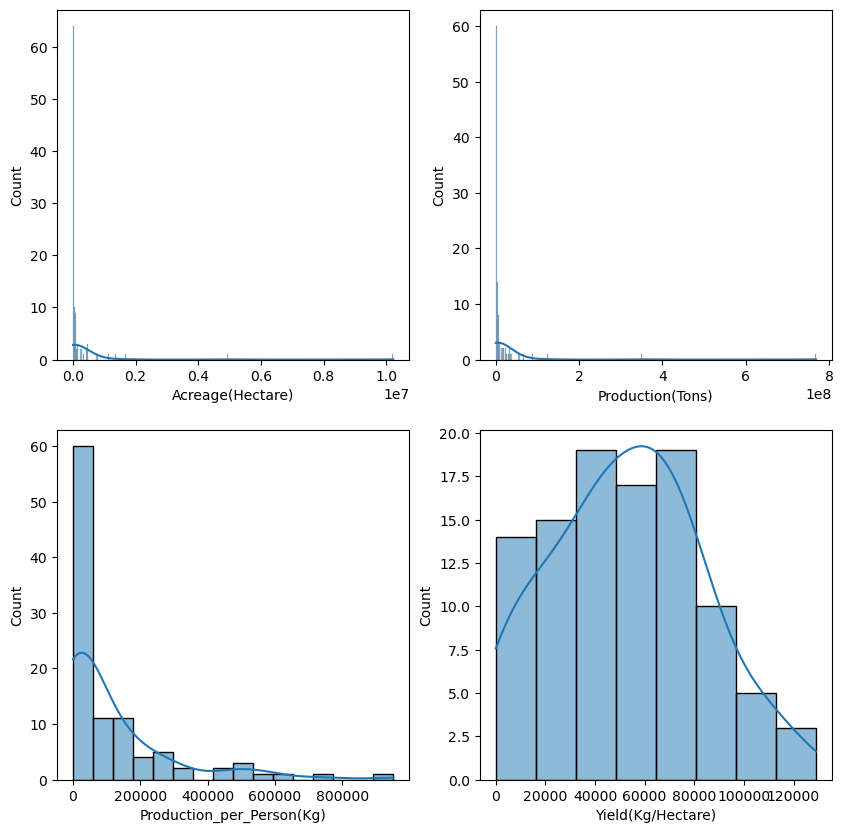

In [20]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(df['Acreage(Hectare)'],kde= True)
plt.subplot(2,2,2)
sns.histplot(df['Production(Tons)'],kde= True)
plt.subplot(2,2,3)
sns.histplot(df['Production_per_Person(Kg)'],kde= True)
plt.subplot(2,2,4)
sns.histplot(df['Yield(Kg/Hectare)'],kde= True)

#### First 3 column have skew distribution and last one is normally distributed.

#### Checking for outliers

<Axes: ylabel='Yield(Kg/Hectare)'>

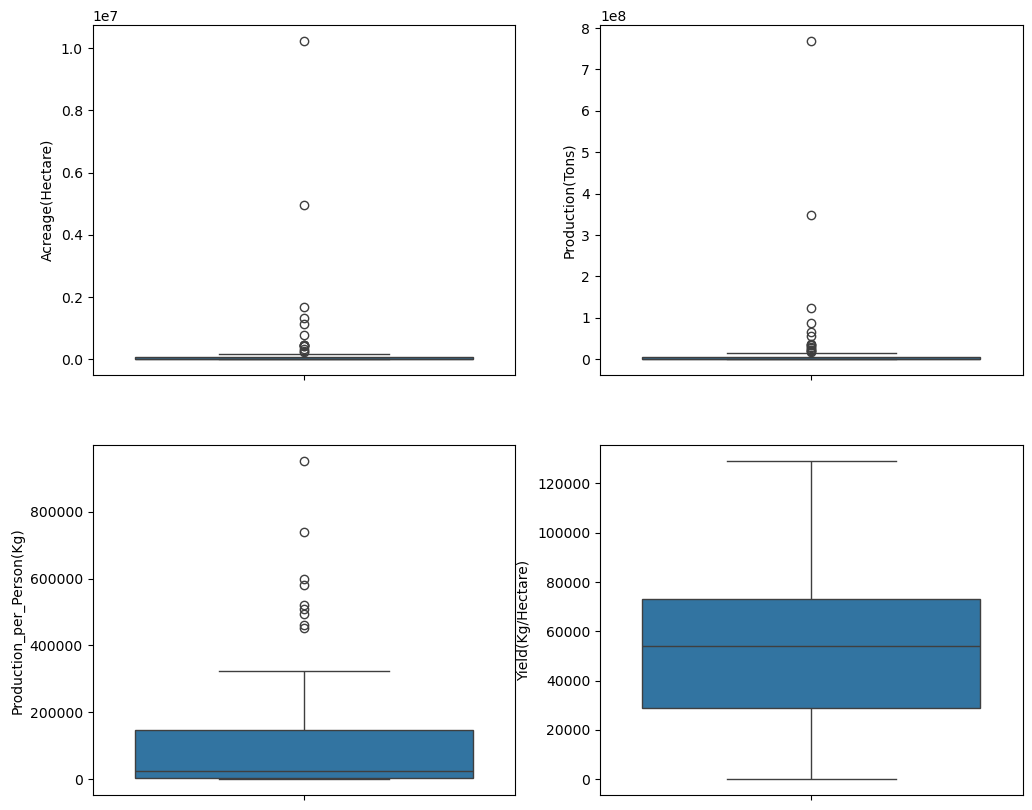

In [21]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(df['Acreage(Hectare)'])
plt.subplot(2,2,2)
sns.boxplot(df['Production(Tons)'])
plt.subplot(2,2,3)
sns.boxplot(df['Production_per_Person(Kg)'])
plt.subplot(2,2,4)
sns.boxplot(df['Yield(Kg/Hectare)'])

#### Due to skew distribution there are outliers but these outliers are important as they are max values.

In [22]:
df.describe()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


<Axes: ylabel='Yield(Kg/Hectare)'>

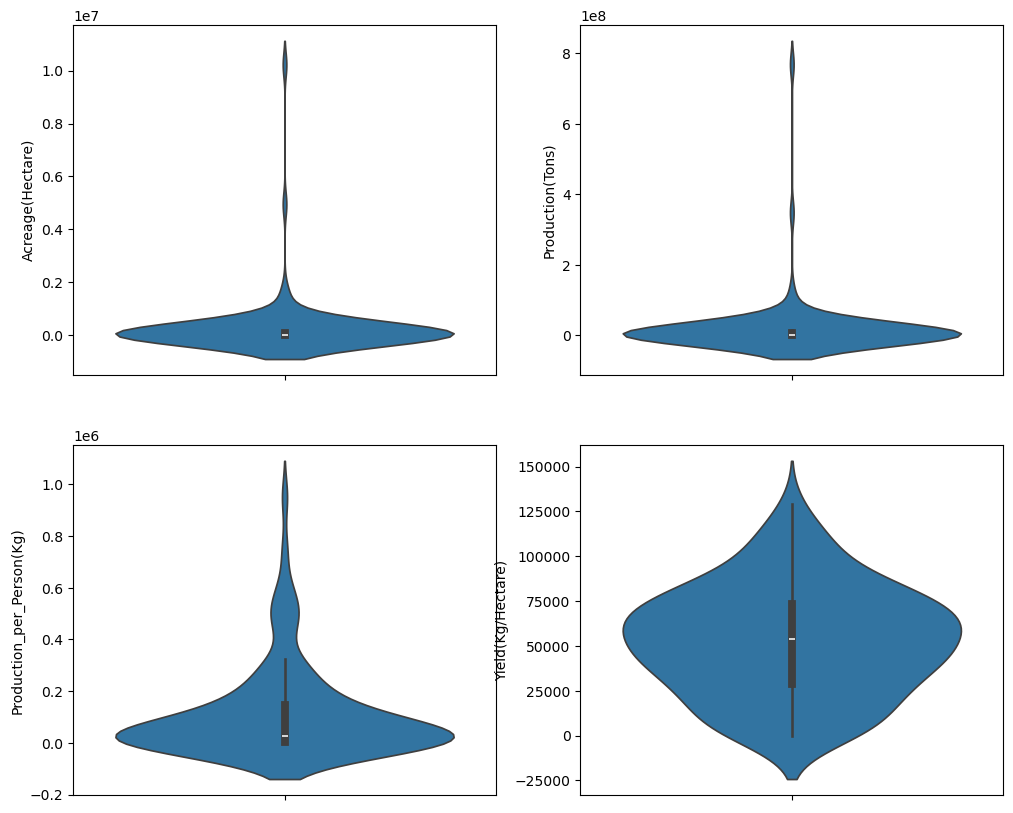

In [23]:
# Checking Distribution and skewness through Violinplot
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(df['Acreage(Hectare)'])
plt.subplot(2,2,2)
sns.violinplot(df['Production(Tons)'])
plt.subplot(2,2,3)
sns.violinplot(df['Production_per_Person(Kg)'])
plt.subplot(2,2,4)
sns.violinplot(df['Yield(Kg/Hectare)'])

## Bivariate Analysis

In [24]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [25]:
df_new = df[['Country','Production(Tons)']].set_index("Country")
df_new.head()

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0


In [26]:
df_new['Production(Tons)_percent'] = df_new['Production(Tons)']/df_new['Production(Tons)'].sum()*100
df_new.head()

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,40.727285
India,348448000.0,18.462001
China,123059739.0,6.520138
Thailand,87468496.0,4.634389
Pakistan,65450704.0,3.467809


#### Brazil has max percent of Sugarcane Production.

#### Using pie chart

<Axes: ylabel='Production(Tons)_percent'>

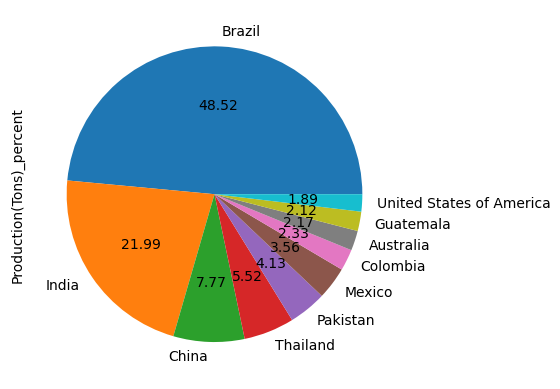

In [27]:
# plt.figure(figsize=(15,15))
# plt.pie(df_new['Production(Tons)_percent'],autopct='%.2f',labeldistance=2)
# plt.show()
df_new['Production(Tons)_percent'].head(10).plot(kind = 'pie', autopct = '%.2f')

#### Using Bar Graph

<Axes: xlabel='Country'>

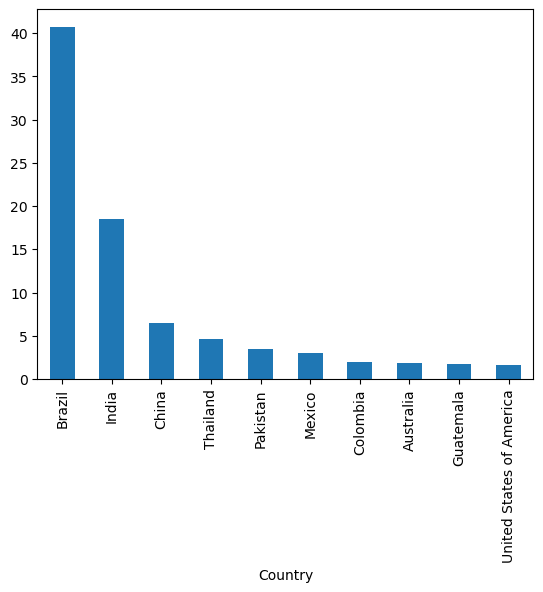

In [28]:
df_new['Production(Tons)_percent'].head(10).plot(kind = 'bar')

C:\Users\ACT\AppData\Local\Temp\ipykernel_1544\3240113120.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


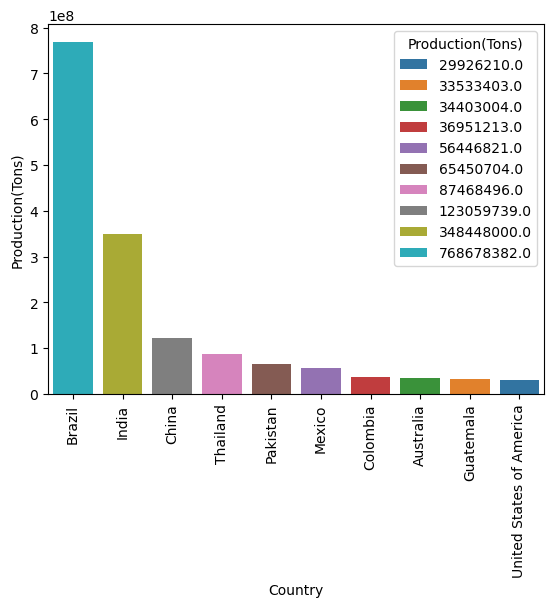

In [39]:
ax = sns.barplot(data = df.head(10),x ='Country', y='Production(Tons)',palette='tab10', hue = 'Production(Tons)')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

#### This shows that Brazil has the highest Production percent followed by India, China, Thailand,etc.

#### 1. Which Country Has the Highest Acreage (Land)?

C:\Users\ACT\AppData\Local\Temp\ipykernel_1544\3398037130.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


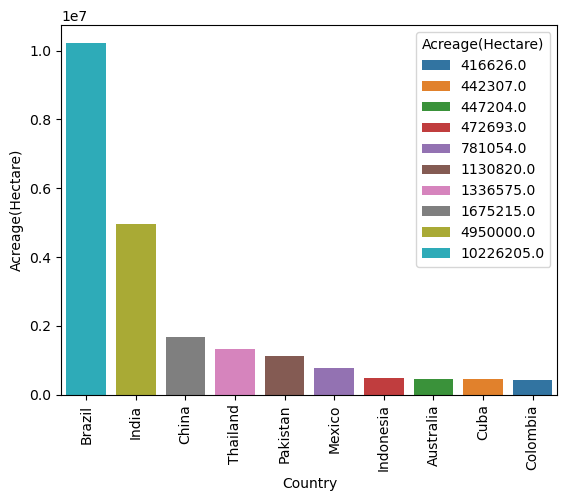

In [124]:
df_acr = df.sort_values('Acreage(Hectare)',ascending=False)
ax = sns.barplot(data = df_acr.head(10),x ='Country', y='Acreage(Hectare)',palette='tab10', hue= 'Acreage(Hectare)')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

#### Brazil Has the Highest Acreage (Land).

#### 2. Which Country Has the Highest Yield per Hectare?

C:\Users\ACT\AppData\Local\Temp\ipykernel_1544\1243578323.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


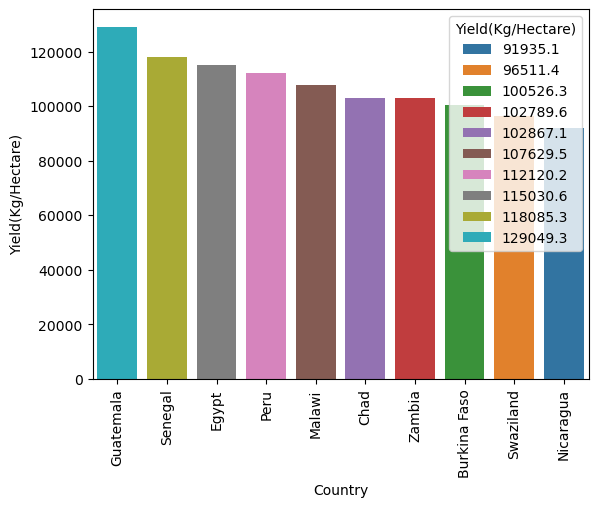

In [37]:
df_yield = df.sort_values('Yield(Kg/Hectare)',ascending=False)
ax = sns.barplot(data = df_yield.head(10),x ='Country', y='Yield(Kg/Hectare)',palette='tab10', hue= 'Yield(Kg/Hectare)')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

#### Guatemala has the Highest Yield per Hectare

#### 3. Which Country Has the Highest Production per Person?

C:\Users\ACT\AppData\Local\Temp\ipykernel_1544\2310809307.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


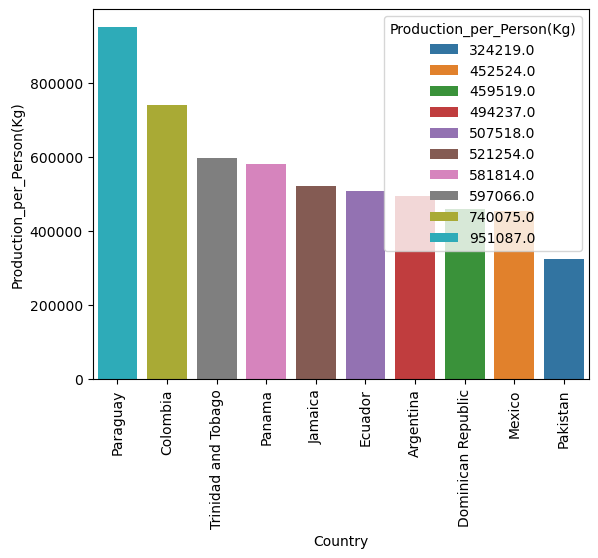

In [38]:
df_prod = df.sort_values('Production_per_Person(Kg)',ascending=False)
ax = sns.barplot(data = df_prod.head(10),x ='Country', y='Production_per_Person(Kg)',palette='tab10', hue= 'Production_per_Person(Kg)')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

#### Paraguay has the Highest Production per Person.

#### 4. Correlation

In [42]:
df2 = df.select_dtypes(include = ['number'])
df2.corr()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_Person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


#### This shows that there is a relation b/w Production(Tons) and Acerage(Hectare).

<Axes: >

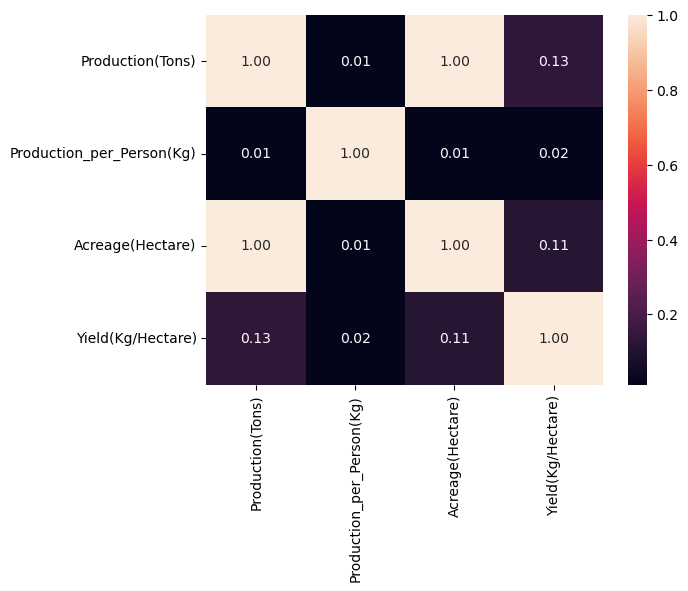

In [44]:
sns.heatmap(data = df2.corr(), annot = True, fmt = '.2f')

#### The realtion betwwen Acreag(Hectare) and Production(Tons) can also be seen in the heatmap.

#### 5. Do Countries with the Highest Land Produce More Sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

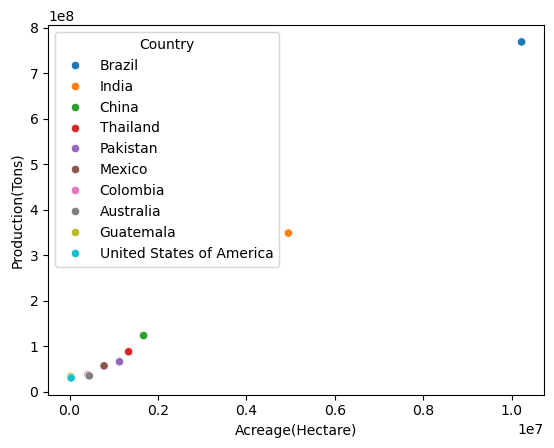

In [51]:
sns.scatterplot(x = 'Acreage(Hectare)',y= 'Production(Tons)',hue = 'Country',data = df.head(10))

#### Yes,Countries with the Highest Land Produce More Sugarcane.

#### 6. Do Countries Yield More Sugarcane per Hectare Produce More Sugarcane in Total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

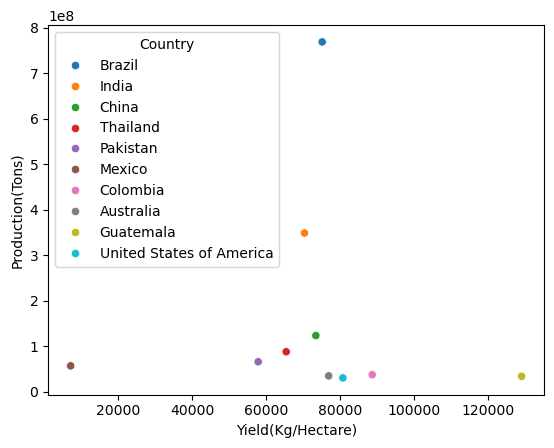

In [79]:
sns.scatterplot(x = 'Yield(Kg/Hectare)',y= 'Production(Tons)',hue = 'Country',data = df.head(10))

#### No, Countries Yield more Sugarcane per Hectare doesn't Produce more Sugarcane in Total, e.g Guatemala has highest Yeild but not that much of Production

### Analysis for Continents

#### Analyzing Sugarcane Production by Continent

In [93]:
# df_continent = df.select_dtypes(include=['number']).groupby(by = 'Continent').sum()
# df_continent.head()
df_continent = df.drop('Country',axis = 1)
df_continent = df_continent.groupby('Continent').sum()

#### 1. Which continent produces maximum Sugarcane?

In [96]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

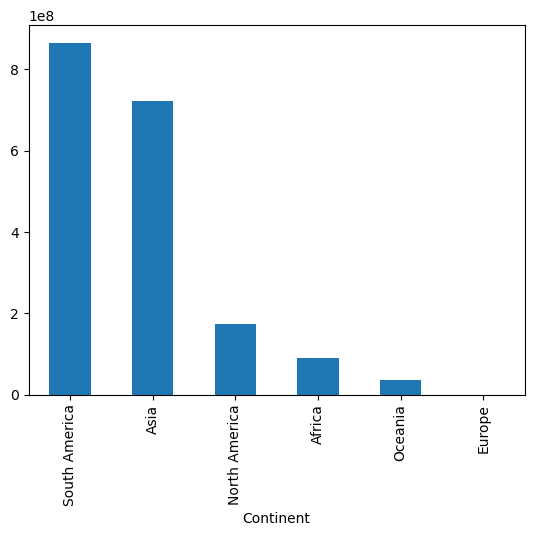

In [94]:
df_continent['Production(Tons)'].sort_values(ascending =False).plot(kind ='bar')

#### South America is the leading producer, followed by Asia, North America and so on.

<Axes: xlabel='Continent'>

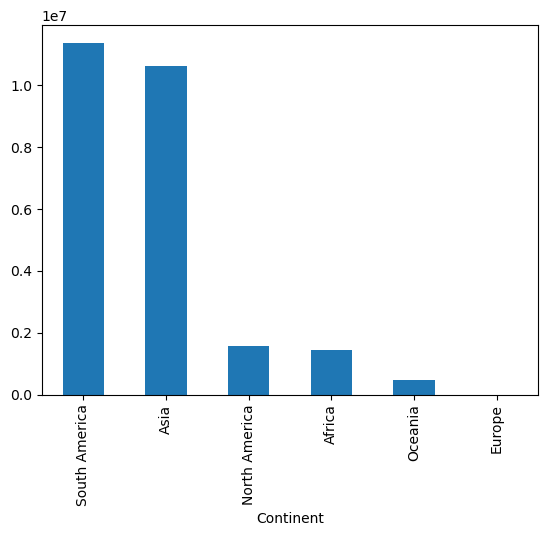

In [95]:
df_continent['Acreage(Hectare)'].sort_values(ascending =False).plot(kind ='bar')

#### The reason is clear that South America uses large area of land for sugarcane producion.

#### 2. Does the Number of Countries in a Continent Affect Sugarcane Production?

In [106]:
df_continent['Number_of_Countries'] = df['Continent'].value_counts()
df_continent

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),Number of Countries,Number_of_Countries
Continent,,,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38,38
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25,25
Europe,5823.0,536.000,71.0,131870.9,2,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4,4
South America,865588126.0,3505531.738,11369236.0,677192.7,11,11


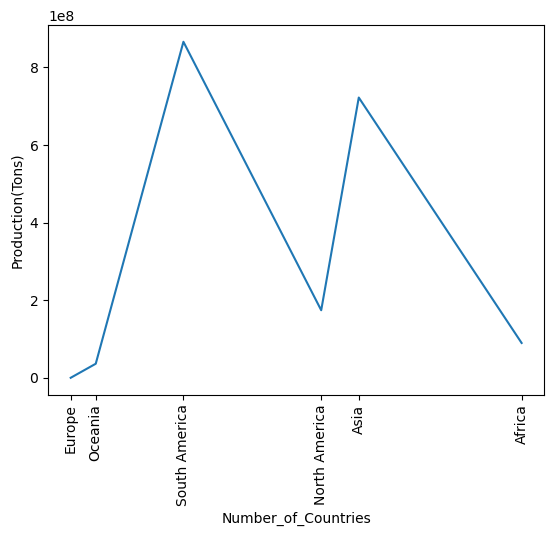

In [116]:
continent_names = df_continent.index.to_list()
sns.lineplot(x = 'Number_of_Countries',y = 'Production(Tons)',data = df_continent)
plt.xticks(df_continent['Number_of_Countries'],continent_names,rotation = 90)
plt.show()

#### No, Number of Countries in a Continent don't affect the production.

#### 3. Do Continent with highest land produces more sugarcane?

<Axes: xlabel='Continent'>

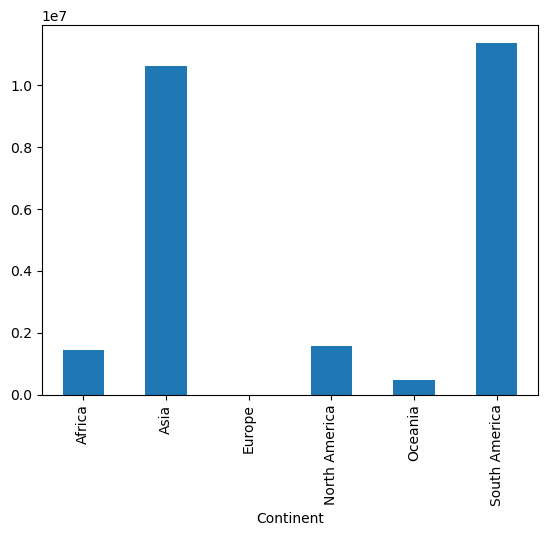

In [119]:
df_continent['Acreage(Hectare)'].plot(kind = 'bar')

#### Yes, Continents with more Land, Produce more.

#### 4. Production Distribution by Continent

<Axes: ylabel='Production(Tons)'>

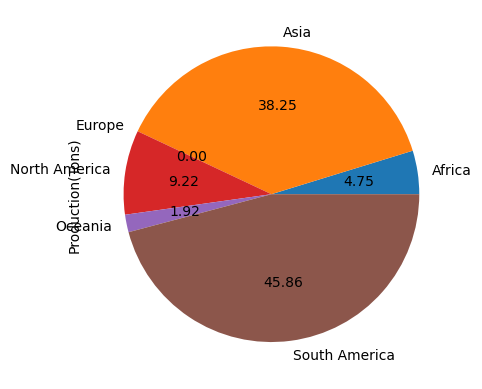

In [123]:
df_continent['Production(Tons)'].plot(kind = 'pie',autopct = '%.2f')

#### 5. Correlation

In [117]:
df_continent.corr()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),Number of Countries,Number_of_Countries
Production(Tons),1.000000,0.522211,0.994897,0.091201,0.109244,0.109244
Production_per_Person(Kg),0.522211,1.000000,0.463215,0.542961,0.540086,0.540086
Acreage(Hectare),0.994897,0.463215,1.000000,0.111166,0.132817,0.132817
Yield(Kg/Hectare),0.091201,0.542961,0.111166,1.000000,0.989712,0.989712
Number of Countries,0.109244,0.540086,0.132817,0.989712,1.000000,1.000000
Number_of_Countries,0.109244,0.540086,0.132817,0.989712,1.000000,1.000000
